In [260]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv


In [261]:
df = pd.read_csv("/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv")
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

###### Data Cleaning

In [263]:
#checking for null values
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

The parental_education_level column, has 91 null values, we need to fill the null values

In [264]:
df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])

In [265]:
df.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

there are no null values now, 

In [266]:
df.drop(columns="student_id", inplace=True)

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       1000 non-null   object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   in

the data is now clean for Exploratory Data Analysis

In [268]:
df.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


### Exploratory Data Analysis and Visualization

In [269]:
corr_data = df.select_dtypes(exclude="object")
corr_data.head(2)

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0


In [270]:
corr_data.corr()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
age,1.000000,0.003971,-0.009151,-0.001174,-0.026055,0.037482,-0.003836,-0.045101,-0.008907
study_hours_per_day,0.003971,1.000000,0.020282,-0.031158,0.026264,-0.027757,-0.028701,-0.003768,0.825419
social_media_hours,-0.009151,0.020282,1.000000,0.011477,0.040479,0.018236,-0.037319,0.001496,-0.166733
netflix_hours,-0.001174,-0.031158,0.011477,1.000000,-0.002092,-0.000935,-0.006448,0.008034,-0.171779
attendance_percentage,-0.026055,0.026264,0.040479,-0.002092,1.000000,0.013756,-0.007857,-0.018745,0.089836
sleep_hours,0.037482,-0.027757,0.018236,-0.000935,0.013756,1.000000,0.019769,-0.006508,0.121683
exercise_frequency,-0.003836,-0.028701,-0.037319,-0.006448,-0.007857,0.019769,1.000000,-0.000242,0.160107
mental_health_rating,-0.045101,-0.003768,0.001496,0.008034,-0.018745,-0.006508,-0.000242,1.000000,0.321523
exam_score,-0.008907,0.825419,-0.166733,-0.171779,0.089836,0.121683,0.160107,0.321523,1.000000


<Axes: >

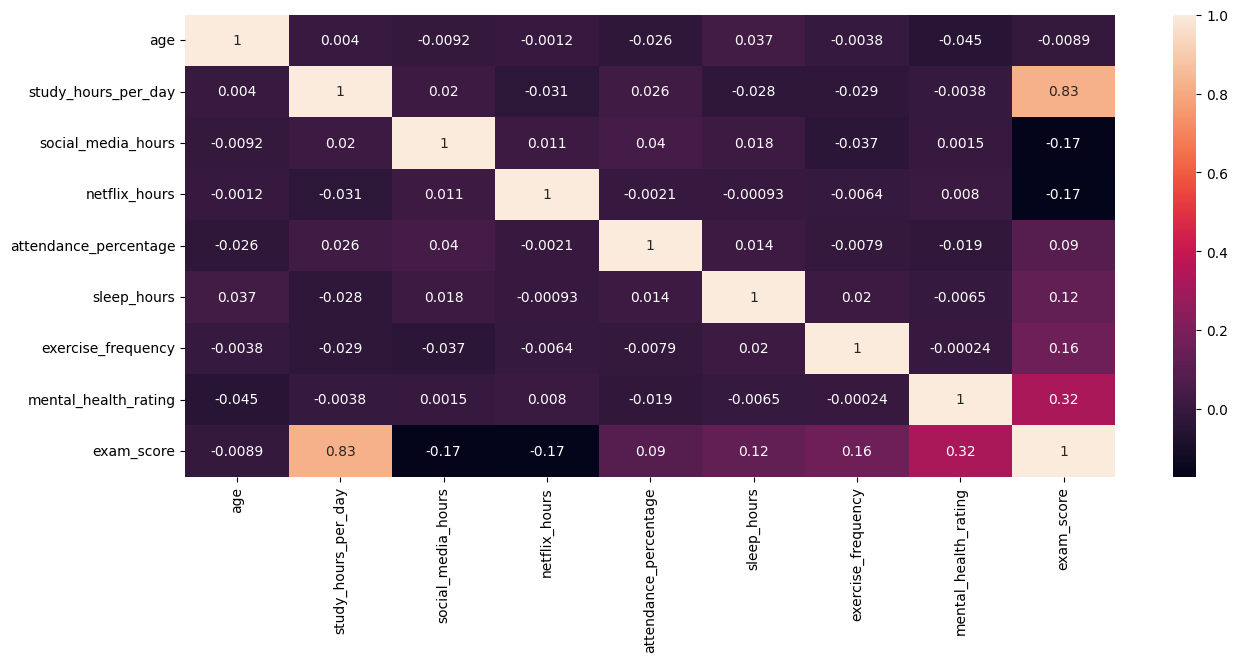

In [271]:
plt.figure(figsize=(15,6))
sns.heatmap(corr_data.corr(), annot=True)

* Exam score has a positive correlation, with study_hours_per_day of 0.83, if study hours increases,  the exam score also increases
* Exam score has a weak negative correaltion with social _media hours, if spcial media hours increase, the exam score decreases
* Increase in netflix hours causes decrease in exam _score.
* Exam score has a Moderate positive correlation — better mental health relates to better performance.
  

In [272]:
df.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


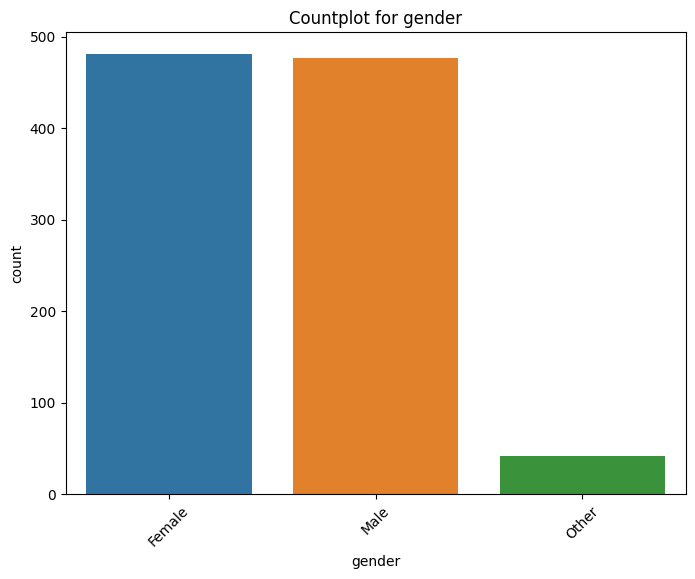

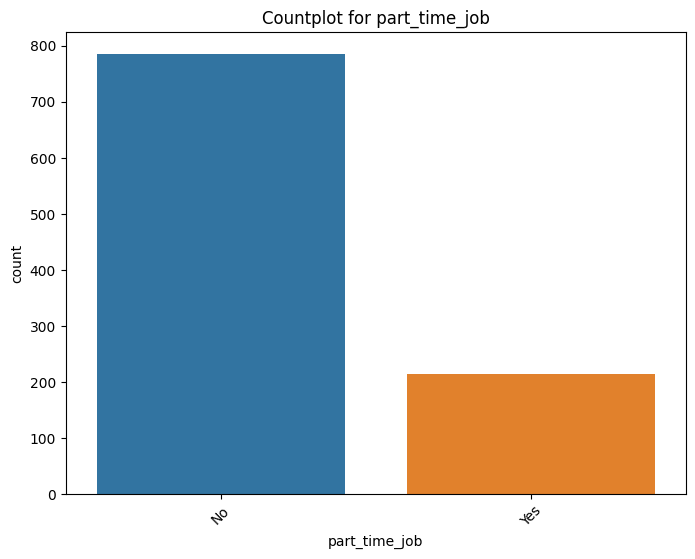

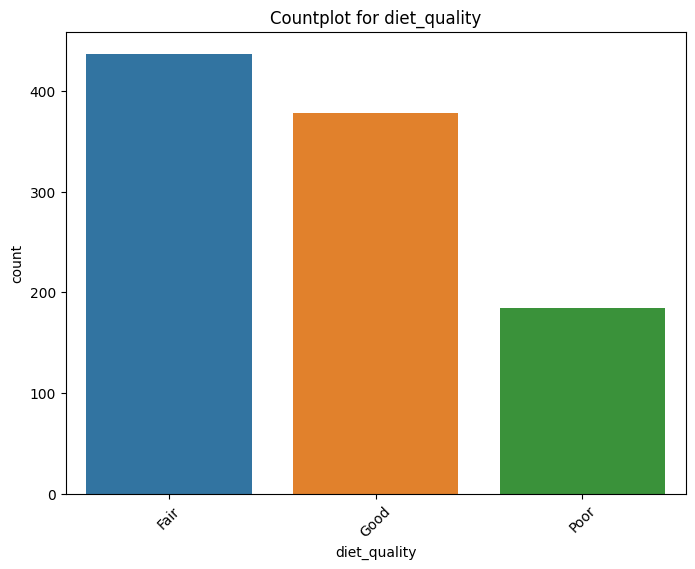

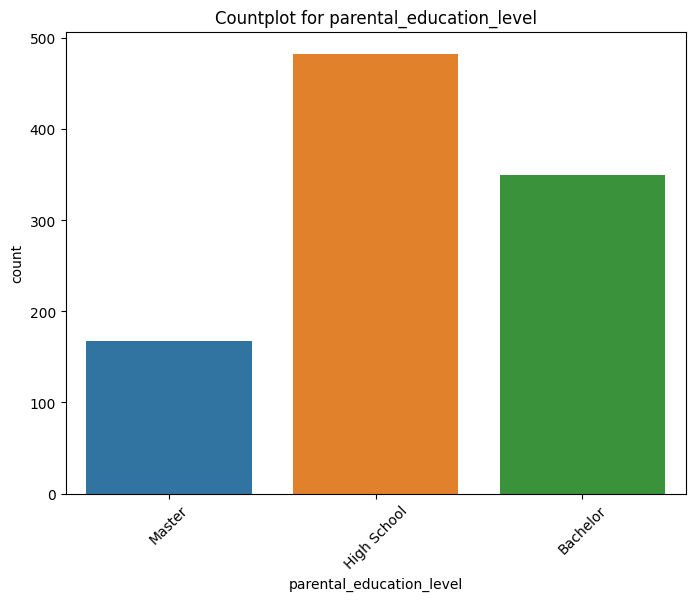

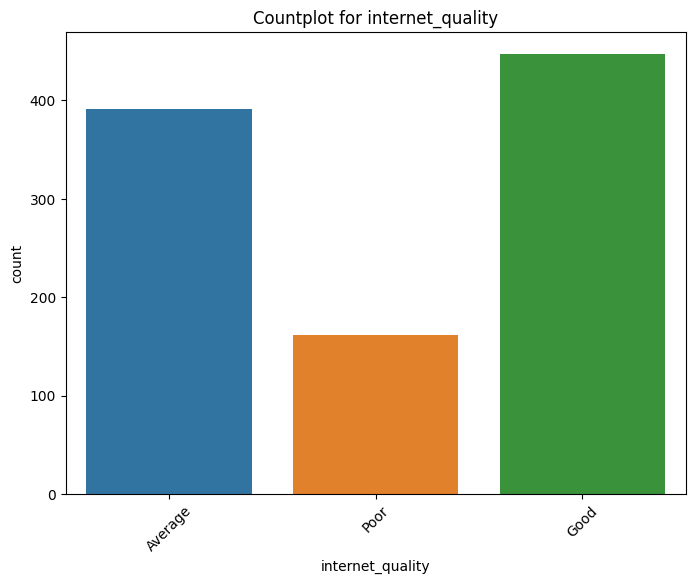

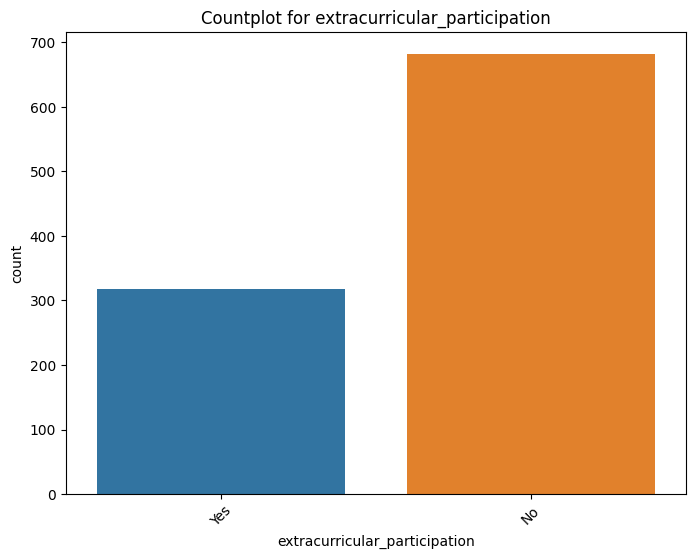

In [273]:

for column in df.select_dtypes('object').columns:
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.countplot(x=df[column])  # Create the countplot for the column
    plt.title(f'Countplot for {column}')  # Set the title for each plot
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()  # Display the plot

* The dataset had equal distribution of male and females
* Most students dont have a side hustle
* Most students had their diet nutrinets fair
* Most parents just reached Highschool
* The internet quality was good for most students
* Most students did not participate in extracurricular activities

In [274]:
df.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


##### Bivariate Analysis

In [275]:
import plotly.express as px

fig = px.scatter(df, x="study_hours_per_day", y="exam_score", color="study_hours_per_day",title="Study Hours vs Exam Score")
fig.show()

Study Hours per day Increases with an Increase in Exam score

In [276]:
fig = px.scatter(df, x="social_media_hours", y="exam_score",color="social_media_hours", title="Social media vs Exam Score",trendline="ols")
fig.show()

An increase in social media hours, causes a decreases in exam score

In [277]:
corr_data.corr()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
age,1.000000,0.003971,-0.009151,-0.001174,-0.026055,0.037482,-0.003836,-0.045101,-0.008907
study_hours_per_day,0.003971,1.000000,0.020282,-0.031158,0.026264,-0.027757,-0.028701,-0.003768,0.825419
social_media_hours,-0.009151,0.020282,1.000000,0.011477,0.040479,0.018236,-0.037319,0.001496,-0.166733
netflix_hours,-0.001174,-0.031158,0.011477,1.000000,-0.002092,-0.000935,-0.006448,0.008034,-0.171779
attendance_percentage,-0.026055,0.026264,0.040479,-0.002092,1.000000,0.013756,-0.007857,-0.018745,0.089836
sleep_hours,0.037482,-0.027757,0.018236,-0.000935,0.013756,1.000000,0.019769,-0.006508,0.121683
exercise_frequency,-0.003836,-0.028701,-0.037319,-0.006448,-0.007857,0.019769,1.000000,-0.000242,0.160107
mental_health_rating,-0.045101,-0.003768,0.001496,0.008034,-0.018745,-0.006508,-0.000242,1.000000,0.321523
exam_score,-0.008907,0.825419,-0.166733,-0.171779,0.089836,0.121683,0.160107,0.321523,1.000000


In [278]:
fig = px.scatter(df, x="netflix_hours", y="exam_score",color="netflix_hours", title="netflix_hours vs Exam Score",trendline="ols")
fig.show()

An increase in netflix  hours, causes a decreases in exam score

In [279]:
fig = px.bar(df, x="gender", y="exam_score",color="gender", title="netflix_hours vs Exam Score", barmode='group')
fig.show()

Increase in mental health rating shows an increase in exam score

In [280]:
df.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [281]:
gender_score = df.groupby("gender")["exam_score"].sum()
fig = px.bar(gender_score, x=gender_score.index, y=gender_score.values,color=gender_score.index, title="netflix_hours vs Exam Score")
fig.show()

Famele Students perfomed slightly better than their male counterparts

In [282]:
gen_job_exam = df.groupby(["gender", "part_time_job"])["exam_score"].sum()
gen_job_exam_df = gen_job_exam.reset_index()
gen_job_exam_df

,gender,part_time_job,exam_score
0,Female,No,26806.6
1,Female,Yes,6739.0
2,Male,No,25692.7
3,Male,Yes,7396.0
4,Other,No,2322.4
5,Other,Yes,644.8


In [283]:
fig = px.bar(gen_job_exam_df, x="gender", y="exam_score",color="part_time_job", title="Gender perfomance based on part_time_job", barmode="group")
fig.show()

Most students with No part time job perfomed better than those with part jibs in both male, female and other genders

In [284]:
gen_diet_score = df.groupby(["gender", "diet_quality"])["exam_score"].sum()
gen_diet_score = gen_diet_score.reset_index()
gen_diet_score

,gender,diet_quality,exam_score
0,Female,Fair,14670.7
1,Female,Good,12597.8
2,Female,Poor,6277.1
3,Male,Fair,14792.9
4,Male,Good,12687.4
5,Male,Poor,5608.4
6,Other,Fair,1313.8
7,Other,Good,935.3
8,Other,Poor,718.1


In [285]:

fig = px.bar(gen_diet_score, x="gender", y="exam_score",color="diet_quality", title="Gender perfomance based on diet quality", barmode="group")
fig.show()

Students with a Low diet quality has low exam scores as compared to other students, showing diet quality affects studenst perfomance

In [286]:
gen_par_score = df.groupby(["gender", "parental_education_level"])["exam_score"].sum()
gen_par_score = gen_par_score.reset_index()
gen_par_score

,gender,parental_education_level,exam_score
0,Female,Bachelor,12423.2
1,Female,High School,15656.8
2,Female,Master,5465.6
3,Male,Bachelor,11638.7
4,Male,High School,16094.7
5,Male,Master,5355.3
6,Other,Bachelor,533.5
7,Other,High School,1884.1
8,Other,Master,549.6


In [287]:
fig = px.bar(gen_par_score, x="gender", y="exam_score",color="parental_education_level", title="Gender perfomance based on parental education level", barmode="group")
fig.show()

* Students whom parents had reached Just highschool as their education level, perfomed higher or had a higher exam score than their counterparts 

In [288]:
gen_extra_score = df.groupby(["gender", "extracurricular_participation"])["exam_score"].sum()
gen_extra_score = gen_extra_score.reset_index()
gen_extra_score

,gender,extracurricular_participation,exam_score
0,Female,No,22797.5
1,Female,Yes,10748.1
2,Male,No,22671.5
3,Male,Yes,10417.2
4,Other,No,1992.3
5,Other,Yes,974.9


In [289]:
fig = px.bar(gen_extra_score, x="gender", y="exam_score",color="extracurricular_participation", title="Gender perfomance based on extracurricular activity", barmode="group")
fig.show()

Most students ds did not engage in extra curricular activity even tho we saw an increase in ectracurricular activity causes a slight improvement in the exam score

## Machine Learning

#### Data preprocessing 

In [290]:
import time
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_absolute_error


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       1000 non-null   object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   in

In [292]:
for column in df.select_dtypes("object").columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

#### Data Splitting and Standardization

In [293]:
X = df.iloc[:, :14]
y = df.iloc[:,14]

In [294]:
scaler=StandardScaler()
X_scaled  =scaler.fit_transform(X)

In [295]:
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y, test_size=0.2)

#### Building model, Training , Predicting and Model Evaluation

In [296]:


models = {
    "LinearRegression": LinearRegression(),
    "Support Vector Machine": SVR(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
}

results_regression = []

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    r2 = r2_score(y_test, pred) * 100
    elapsed_time = time.time() - start_time

    results_regression.append({
        "model": name,
        "r2_score": r2,
        "time": elapsed_time
    })

# Put the DataFrame creation OUTSIDE the loop
data_results_regression = pd.DataFrame(results_regression)
print(data_results_regression)


                    model   r2_score      time
0        LinearRegression  89.531394  0.004042
1  Support Vector Machine  69.771338  0.082598
2   DecisionTreeRegressor  64.249011  0.009262
3   RandomForestRegressor  83.247916  0.495239


Text(0.5, 1.0, 'Model Accuracy (R-squared) Comparison')

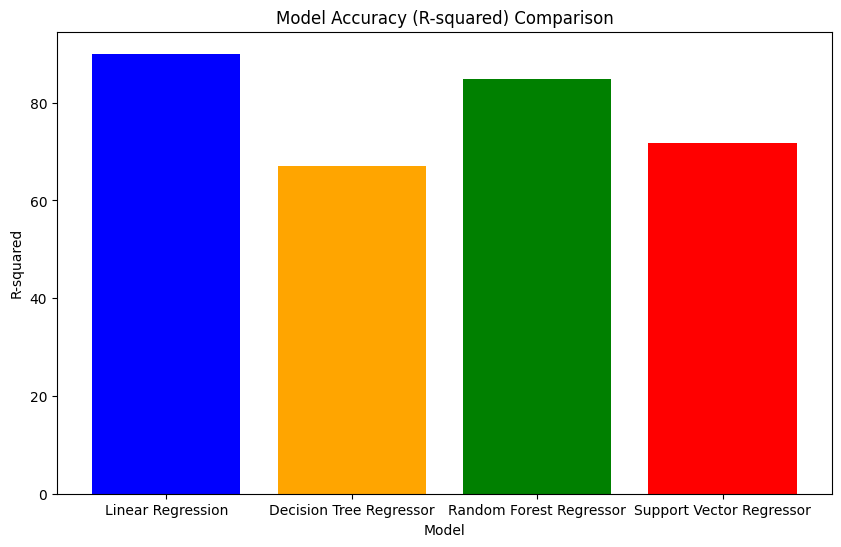

In [297]:
import matplotlib.pyplot as plt

# Store the R-squared values and model names
models_names = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Support Vector Regressor']
r2_scores = [90.009945,66.981074,84.753475,71.680351]  # Replace with your R-squared values

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models_names, r2_scores, color=['blue', 'orange', 'green', 'red'])

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Model Accuracy (R-squared) Comparison')

Linear Regression was most accurate Model , tih 91 percent prediction